In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
auth.authenticate_user()
gauth= GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
downloaded = drive.CreateFile({'id': '15QwqCxPg6UO-RBNasgMwdRm41LzJQ2q2'})
downloaded.GetContentFile('train.csv')

In [5]:
import pandas as pd
data = pd.read_csv('train.csv')
data.head()

,source_node,destination_node
0,1,690569
1,1,315892
2,1,189226
3,2,834328
4,2,1615927


In [6]:
print('The Data consists of {} data points.' .format(data.shape[0]))

The Data consists of 9437519 data points.


In [7]:
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd
import datetime 
import time 
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib import rcParams  
from sklearn.cluster import MiniBatchKMeans, KMeans
import math
import pickle
import os

import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle

In [8]:
data.isnull().sum()

source_node         0
destination_node    0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9437519 entries, 0 to 9437518
Data columns (total 2 columns):
 #   Column            Dtype
---  ------            -----
 0   source_node       int64
 1   destination_node  int64
dtypes: int64(2)
memory usage: 144.0 MB


In [10]:
print('Number of duplicate Entries : ', data.duplicated().sum())

Number of duplicate Entries :  0


In [11]:
data.to_csv('train_woheader.csv',header=False,index=False)

In [12]:
g = nx.read_edgelist('train_woheader.csv', delimiter=',',create_using=nx.DiGraph(),nodetype=int)
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 1862220
Number of edges: 9437519
Average in degree:   5.0679
Average out degree:   5.0679


In [13]:
pd.read_csv('train.csv', nrows=50).to_csv('train_woheader_sample.csv', header=False, index=False)

Name: 
Type: DiGraph
Number of nodes: 66
Number of edges: 50
Average in degree:   0.7576
Average out degree:   0.7576


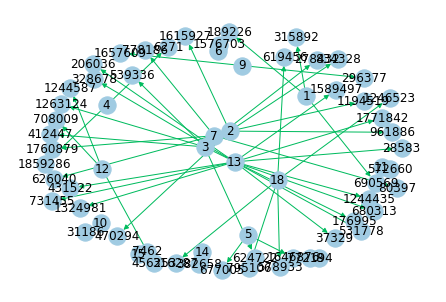

In [14]:
subgraph=nx.read_edgelist('train_woheader_sample.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
# https://stackoverflow.com/questions/9402255/drawing-a-huge-graph-with-networkx-and-matplotlib

pos=nx.spring_layout(subgraph)
nx.draw(subgraph,pos,node_color='#A0CBE2',edge_color='#00bb5e',width=1,edge_cmap=plt.cm.Blues,with_labels=True)
plt.savefig("graph_sample.pdf")
print(nx.info(subgraph))

In [15]:
print('Number of unique persons :' , len(g.nodes()))

Number of unique persons : 1862220


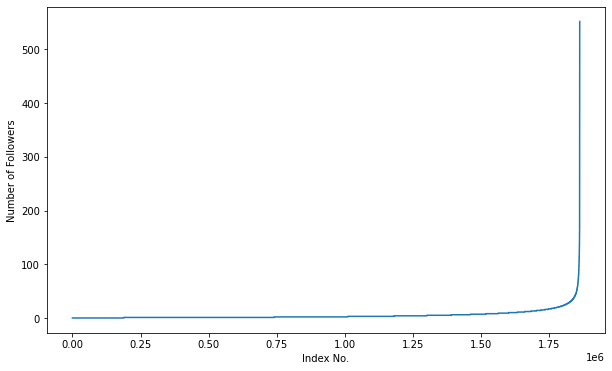

In [16]:
indegree_dist = list(dict(g.in_degree()).values()) 
indegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(indegree_dist)
plt.xlabel('Index No.')
plt.ylabel('Number of Followers')
plt.show()

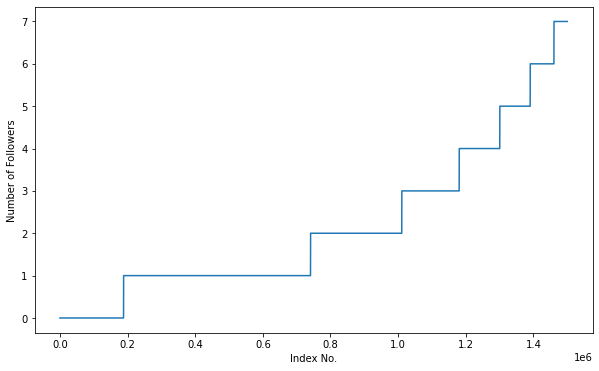

In [17]:
plt.figure(figsize=(10,6))
plt.plot(indegree_dist[:1500000])
plt.xlabel('Index No.')
plt.ylabel('Number of Followers')
plt.show()

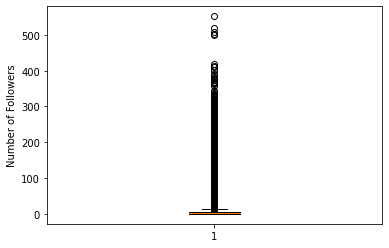

In [18]:
plt.boxplot(indegree_dist)
plt.ylabel('Number of Followers')
plt.show()

In [19]:
for i in range(1,11):
  print(90+i, 'percentile value is ', np.percentile(indegree_dist, 90+i))

91 percentile value is  13.0
92 percentile value is  14.0
93 percentile value is  15.0
94 percentile value is  17.0
95 percentile value is  19.0
96 percentile value is  21.0
97 percentile value is  24.0
98 percentile value is  29.0
99 percentile value is  40.0
100 percentile value is  552.0


In [20]:
for i in range(1,11):
  print(99+(i/10), 'percentile value is ', np.percentile(indegree_dist, (99+(i/10))))

99.1 percentile value is  42.0
99.2 percentile value is  44.0
99.3 percentile value is  47.0
99.4 percentile value is  50.0
99.5 percentile value is  55.0
99.6 percentile value is  61.0
99.7 percentile value is  70.0
99.8 percentile value is  84.0
99.9 percentile value is  112.0
100.0 percentile value is  552.0


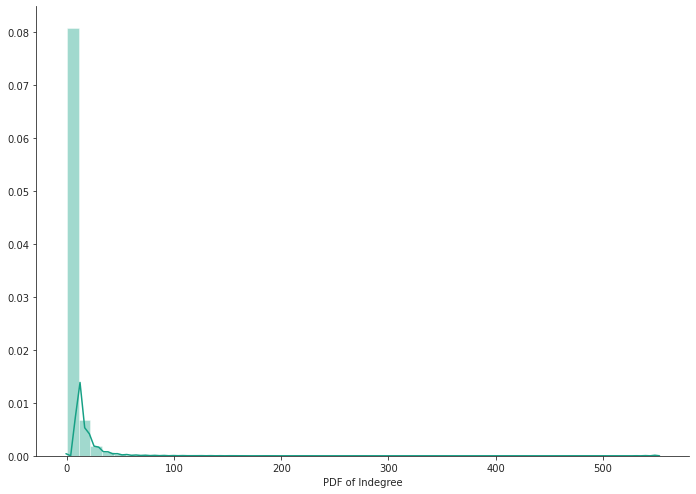

In [21]:
%matplotlib inline
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(indegree_dist, color='#16A085')
plt.xlabel('PDF of Indegree')
sns.despine()

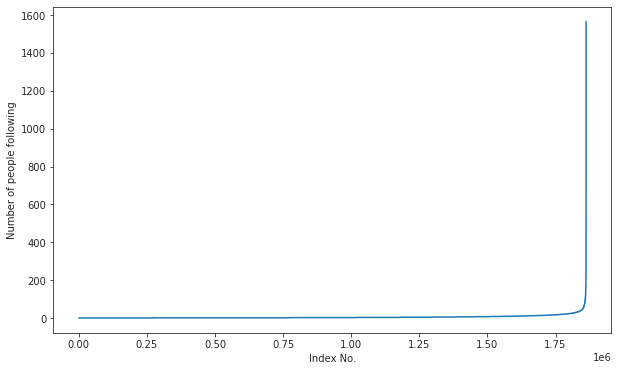

In [22]:
outdegree_dist = list(dict(g.out_degree).values())
outdegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(outdegree_dist)
plt.xlabel('Index No.')
plt.ylabel('Number of people following')
plt.show()

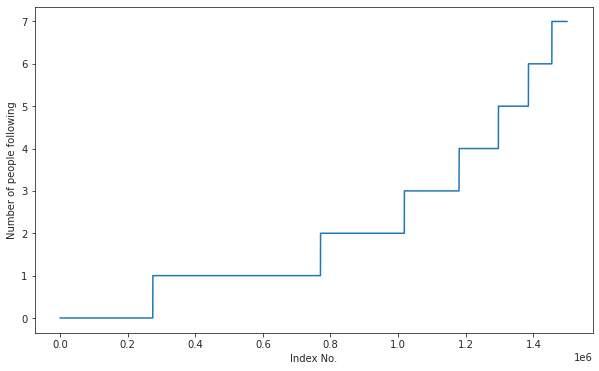

In [23]:
plt.figure(figsize=(10,6))
plt.plot(outdegree_dist[:1500000])
plt.xlabel('Index No.')
plt.ylabel('Number of people following')
plt.show()

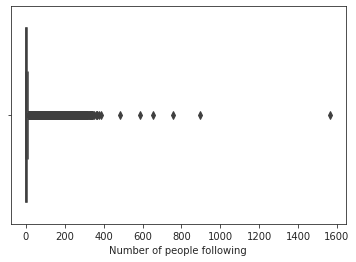

In [24]:
sns.boxplot(outdegree_dist)
plt.xlabel('Number of people following')
plt.show()

In [25]:
for i in range(1,11):
  print(90+i, 'percentile value is ', np.percentile(outdegree_dist, 90+i))

91 percentile value is  13.0
92 percentile value is  14.0
93 percentile value is  15.0
94 percentile value is  17.0
95 percentile value is  19.0
96 percentile value is  21.0
97 percentile value is  24.0
98 percentile value is  29.0
99 percentile value is  40.0
100 percentile value is  1566.0


In [26]:
for i in range(1,11):
  print(99+(i/10), 'percentile value is ', np.percentile(outdegree_dist, (99+(i/10))))

99.1 percentile value is  42.0
99.2 percentile value is  45.0
99.3 percentile value is  48.0
99.4 percentile value is  52.0
99.5 percentile value is  56.0
99.6 percentile value is  63.0
99.7 percentile value is  73.0
99.8 percentile value is  90.0
99.9 percentile value is  123.0
100.0 percentile value is  1566.0


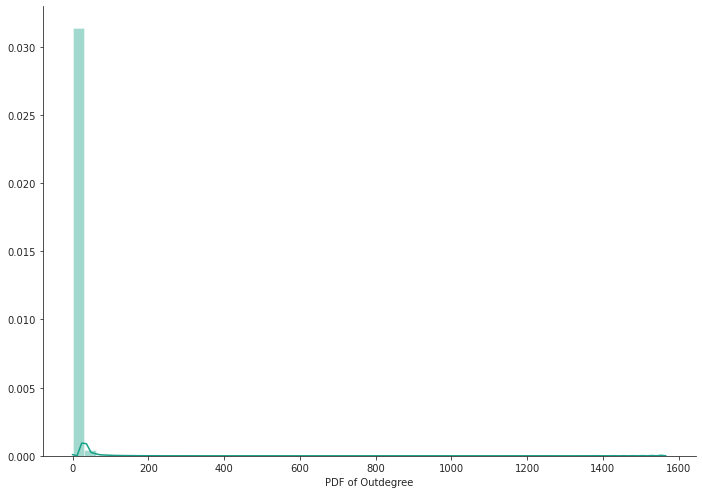

In [27]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(outdegree_dist, color='#16A085')
plt.xlabel('PDF of Outdegree')
sns.despine()

In [28]:
print('Number of people who are not following anyone are ', sum(np.array(outdegree_dist) == 0))
print('Therefore almost {:.2f}% of the people donot follow anyone' .format(((sum(np.array(outdegree_dist) == 0))/len(outdegree_dist))*100))


Number of people who are not following anyone are  274512
Therefore almost 14.74% of the people donot follow anyone


In [29]:
print('Number of people with no followers are ', (sum(np.array(indegree_dist) == 0)))
print('Therefore, almost {:.2f}% of the people have no followers ' .format(((sum(np.array(indegree_dist) == 0))/len(indegree_dist))*100))


Number of people with no followers are  188043
Therefore, almost 10.10% of the people have no followers 


In [30]:
count = 0
for i in g.nodes():
  if len(list(g.predecessors(i)))==0:
    if len(list(g.successors(i)))==0:
      count = count +1
print('Number of people who are either not having any follower nor following others are ', count)

Number of people who are either not having any follower nor following others are  0


In [31]:
from collections import Counter
dict_in = dict(g.in_degree())
dict_out = dict(g.out_degree())
d = Counter(dict_in) + Counter(dict_out)
in_out_degree = np.array(list(d.values()))

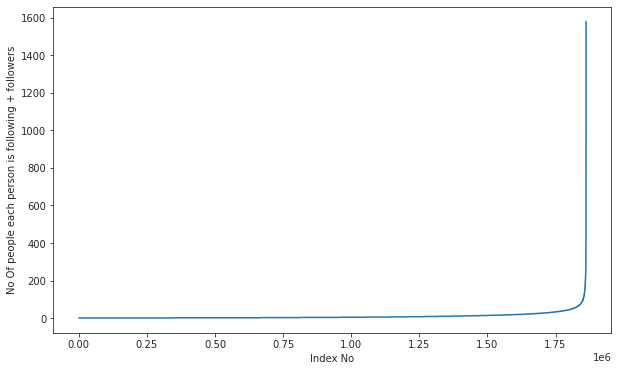

In [32]:
in_out_degree_sort = sorted(in_out_degree)
plt.figure(figsize=(10,6))
plt.plot(in_out_degree_sort)
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following + followers')
plt.show()

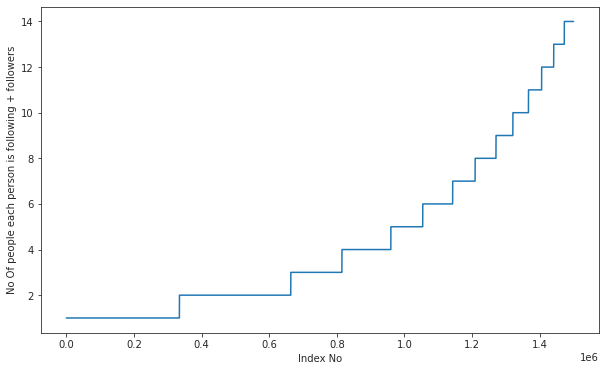

In [33]:
in_out_degree_sort = sorted(in_out_degree)
plt.figure(figsize=(10,6))
plt.plot(in_out_degree_sort[0:1500000])
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following + followers')
plt.show()

In [34]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(in_out_degree_sort,90+i))

90 percentile value is 24.0
91 percentile value is 26.0
92 percentile value is 28.0
93 percentile value is 31.0
94 percentile value is 33.0
95 percentile value is 37.0
96 percentile value is 41.0
97 percentile value is 48.0
98 percentile value is 58.0
99 percentile value is 79.0
100 percentile value is 1579.0


In [35]:
### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(in_out_degree_sort,99+(i/100)))

99.1 percentile value is 83.0
99.2 percentile value is 87.0
99.3 percentile value is 93.0
99.4 percentile value is 99.0
99.5 percentile value is 108.0
99.6 percentile value is 120.0
99.7 percentile value is 138.0
99.8 percentile value is 168.0
99.9 percentile value is 221.0
100.0 percentile value is 1579.0


In [36]:
print('Minimum number of follower + following :', in_out_degree.min())

Minimum number of follower + following : 1


In [37]:
print(np.sum((in_out_degree == in_out_degree.min())), 'people have minimum number of following + follower.')

334291 people have minimum number of following + follower.


In [38]:
print('Maximum number of follower+ following :', in_out_degree.max())
print(np.sum(in_out_degree == in_out_degree.max()), 'people have maximum number of follower+ following.')

Maximum number of follower+ following : 1579
1 people have maximum number of follower+ following.


In [39]:
print('No of weakly connected components',len(list(nx.weakly_connected_components(g))))
count=0
for i in list(nx.weakly_connected_components(g)):
    if len(i)==2:
        count+=1
print('weakly connected components wit 2 nodes',count)

No of weakly connected components 45558
weakly connected components wit 2 nodes 32195


In [40]:
import random

In [41]:
downloaded = drive.CreateFile({'id': '12EDnzTprsDj7Ask-S13xu-nUQKWRhl3V'})
downloaded.GetContentFile('missing_edges_final.p')

In [42]:
%%time
###generating bad edges from given graph
import random
if not os.path.isfile('missing_edges_final.p'):
    #getting all set of edges
    r = csv.reader(open('train_woheader.csv','r'))
    edges = dict()
    for edge in r:
        edges[(edge[0], edge[1])] = 1
        
        
    missing_edges = set([])
    while (len(missing_edges)<9437519):
        a=random.randint(1, 1862220)
        b=random.randint(1, 1862220)
        tmp = edges.get((a,b),-1)
        if tmp == -1 and a!=b:
            try:
                if nx.shortest_path_length(g,source=a,target=b) > 2: 

                    missing_edges.add((a,b))
                else:
                    continue  
            except:  
                    missing_edges.add((a,b))              
        else:
            continue
    pickle.dump(missing_edges,open('missing_edges_final.p','wb'))
else:
    missing_edges = pickle.load(open('missing_edges_final.p','rb'))

CPU times: user 1.99 s, sys: 912 ms, total: 2.91 s
Wall time: 2.9 s


In [43]:
len(missing_edges)

9437519

In [44]:
from sklearn.model_selection import train_test_split
df_pos = pd.read_csv('train.csv')
df_neg = pd.DataFrame(list(missing_edges), columns=['source_node', 'destination_node'])

print('Number of nodes in graph with edges' , df_pos.shape[0])
print('Number of nodes in the graph without edges', df_neg.shape[0])

X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(df_pos, np.ones(len(df_pos)), test_size=0.2, random_state=53)
X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(df_neg, np.zeros(len(df_neg)), test_size=0.2, random_state=53)

print('='*60)
print("Number of nodes in the train data graph with edges", X_train_pos.shape[0],"=",y_train_pos.shape[0])
print("Number of nodes in the train data graph without edges", X_train_neg.shape[0],"=", y_train_neg.shape[0])
print('='*60)
print("Number of nodes in the test data graph with edges", X_test_pos.shape[0],"=",y_test_pos.shape[0])
print("Number of nodes in the test data graph without edges", X_test_neg.shape[0],"=",y_test_neg.shape[0])

#removing header and saving
X_train_pos.to_csv('train_pos_after_eda.csv',header=False, index=False)
X_test_pos.to_csv('test_pos_after_eda.csv',header=False, index=False)
X_train_neg.to_csv('train_neg_after_eda.csv',header=False, index=False)
X_test_neg.to_csv('test_neg_after_eda.csv',header=False, index=False)

Number of nodes in graph with edges 9437519
Number of nodes in the graph without edges 9437519
Number of nodes in the train data graph with edges 7550015 = 7550015
Number of nodes in the train data graph without edges 7550015 = 7550015
Number of nodes in the test data graph with edges 1887504 = 1887504
Number of nodes in the test data graph without edges 1887504 = 1887504


In [45]:
if (os.path.isfile('data/after_eda/train_pos_after_eda.csv')) and (os.path.isfile('data/after_eda/test_pos_after_eda.csv')):        
    train_graph=nx.read_edgelist('data/after_eda/train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    test_graph=nx.read_edgelist('data/after_eda/test_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    print(nx.info(train_graph))
    print(nx.info(test_graph))

    # finding the unique nodes in the both train and test graphs
    train_nodes_pos = set(train_graph.nodes())
    test_nodes_pos = set(test_graph.nodes())

    trY_teY = len(train_nodes_pos.intersection(test_nodes_pos))
    trY_teN = len(train_nodes_pos - test_nodes_pos)
    teY_trN = len(test_nodes_pos - train_nodes_pos)

    print('no of people common in train and test -- ',trY_teY)
    print('no of people present in train but not present in test -- ',trY_teN)

    print('no of people present in test but not present in train -- ',teY_trN)
    print(' % of people not there in Train but exist in Test in total Test data are {} %'.format(teY_trN/len(test_nodes_pos)*100))

In [46]:
# #final train and test data sets
# if (not os.path.isfile('data/after_eda/train_after_eda.csv')) and \
# (not os.path.isfile('data/after_eda/test_after_eda.csv')) and \
# (not os.path.isfile('data/train_y.csv')) and \
# (not os.path.isfile('data/test_y.csv')) and \
# (os.path.isfile('data/after_eda/train_pos_after_eda.csv')) and \
# (os.path.isfile('data/after_eda/test_pos_after_eda.csv')) and \
# (os.path.isfile('data/after_eda/train_neg_after_eda.csv')) and \
# (os.path.isfile('data/after_eda/test_neg_after_eda.csv')):
    
X_train_pos = pd.read_csv('train_pos_after_eda.csv', names=['source_node', 'destination_node'])
X_test_pos = pd.read_csv('test_pos_after_eda.csv', names=['source_node', 'destination_node'])
X_train_neg = pd.read_csv('train_neg_after_eda.csv', names=['source_node', 'destination_node'])
X_test_neg = pd.read_csv('test_neg_after_eda.csv', names=['source_node', 'destination_node'])
print('='*60)
print("Number of nodes in the train data graph with edges", X_train_pos.shape[0])
print("Number of nodes in the train data graph without edges", X_train_neg.shape[0])
print('='*60)
print("Number of nodes in the test data graph with edges", X_test_pos.shape[0])
print("Number of nodes in the test data graph without edges", X_test_neg.shape[0])
X_train = X_train_pos.append(X_train_neg,ignore_index=True)
y_train = np.concatenate((y_train_pos,y_train_neg))
X_test = X_test_pos.append(X_test_neg,ignore_index=True)
y_test = np.concatenate((y_test_pos,y_test_neg)) 

X_train.to_csv('train_after_eda.csv',header=False,index=False)
X_test.to_csv('test_after_eda.csv',header=False,index=False)
pd.DataFrame(y_train.astype(int)).to_csv('train_y.csv',header=False,index=False)
pd.DataFrame(y_test.astype(int)).to_csv('test_y.csv',header=False,index=False)

Number of nodes in the train data graph with edges 7550015
Number of nodes in the train data graph without edges 7550015
Number of nodes in the test data graph with edges 1887504
Number of nodes in the test data graph without edges 1887504


In [47]:
print("Data points in train data",X_train.shape)
print("Data points in test data",X_test.shape)
print("Shape of traget variable in train",y_train.shape)
print("Shape of traget variable in test", y_test.shape)

Data points in train data (15100030, 2)
Data points in test data (3775008, 2)
Shape of traget variable in train (15100030,)
Shape of traget variable in test (3775008,)


In [48]:
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm

In [49]:
train_graph = nx.read_edgelist('train_pos_after_eda.csv', delimiter=',', create_using=nx.DiGraph(), nodetype=int)
print(nx.info(train_graph))

Name: 
Type: DiGraph
Number of nodes: 1781029
Number of edges: 7550015
Average in degree:   4.2391
Average out degree:   4.2391


In [50]:
def Jaccard_distance_for_followee(a, b):
  try:
    if len(set(train_graph.successors(a))) == 0 | len(set(train_graph.successors(b))) == 0:
      return 0
    sim = (len(set(train_graph.successors(a)).intersection(set(train_graph.successors(b)))))/(len(set(train_graph.successors(a)).union(set(train_graph.successors(b)))))
  
  except:
    return 0
  return sim

In [51]:
#one test case
print(Jaccard_distance_for_followee(273084,1505602))

0.0


In [52]:
# For Followers
def Jaccard_distance_for_followers(a,b):
  try:
    if len(set(train_graph.predecessors(a))) == 0| len(set(train_graph.predecessors(b))) == 0:
      return 0
    sim = (len(set(train_graph.predecessors(a)).intersection(set(train_graph.predecessors(b)))))/(len(set(train_graph.predecessors(a)).union(set(train_graph.predecessors(b)))))
  
  except:
    return 0
  return sim

In [53]:
print(Jaccard_distance_for_followers(273084, 1505602))

0.0


In [54]:
#for followees
def cosine_for_followees(a,b):
    try:
        if len(set(train_graph.successors(a))) == 0  | len(set(train_graph.successors(b))) == 0:
            return 0
        sim = (len(set(train_graph.successors(a)).intersection(set(train_graph.successors(b)))))/\
                                    (math.sqrt(len(set(train_graph.successors(a)))*len((set(train_graph.successors(b))))))
        return sim
    except:
        return 0

In [55]:
print(cosine_for_followees(273084,1505602))

0.0


In [56]:
print(cosine_for_followees(273084,1635354))

0.0


In [57]:
def cosine_for_followers(a,b):
    try:
        
        if len(set(train_graph.predecessors(a))) == 0  | len(set(train_graph.predecessors(b))) == 0:
            return 0
        sim = (len(set(train_graph.predecessors(a)).intersection(set(train_graph.predecessors(b)))))/\
                                     (math.sqrt(len(set(train_graph.predecessors(a))))*(len(set(train_graph.predecessors(b)))))
        return sim
    except:
        return 0

In [58]:
print(cosine_for_followers(2,470294))

0.02886751345948129


In [59]:
print(cosine_for_followers(669354,1635354))

0


In [60]:
pr = nx.pagerank(train_graph, alpha=0.85)
pickle.dump(pr, open('page_rank.p', 'wb'))

In [61]:
print('min',pr[min(pr, key=pr.get)])
print('max',pr[max(pr, key=pr.get)])
print('mean',float(sum(pr.values())) / len(pr))

min 1.6560093065944057e-07
max 2.48544585932791e-05
mean 5.614731708432429e-07


In [62]:
#for imputing to nodes which are not there in Train data
mean_pr = float(sum(pr.values())) / len(pr)
print(mean_pr)

5.614731708432429e-07


In [63]:
#if has direct edge then deleting that edge and calculating shortest path
def compute_shortest_path_length(a,b):
    p=-1
    try:
        if train_graph.has_edge(a,b):
            train_graph.remove_edge(a,b)
            p= nx.shortest_path_length(train_graph,source=a,target=b)
            train_graph.add_edge(a,b)
        else:
            p= nx.shortest_path_length(train_graph,source=a,target=b)
        return p
    except:
        return -1

In [64]:
#testing
compute_shortest_path_length(77697, 826021)

10

In [65]:
#testing
compute_shortest_path_length(669354,1635354)

-1

In [66]:
#getting weekly connected edges from graph 
wcc=list(nx.weakly_connected_components(train_graph))
def belongs_to_same_wcc(a,b):
    index = []
    if train_graph.has_edge(b,a):
        return 1
    if train_graph.has_edge(a,b):
            for i in wcc:
                if a in i:
                    index= i
                    break
            if (b in index):
                train_graph.remove_edge(a,b)
                if compute_shortest_path_length(a,b)==-1:
                    train_graph.add_edge(a,b)
                    return 0
                else:
                    train_graph.add_edge(a,b)
                    return 1
            else:
                return 0
    else:
            for i in wcc:
                if a in i:
                    index= i
                    break
            if(b in index):
                return 1
            else:
                return 0

In [67]:
belongs_to_same_wcc(861, 1659750)

0

In [68]:
belongs_to_same_wcc(669354,1635354)

0

In [69]:
#adar index
def calc_adar_in(a,b):
    sum=0
    try:
        n=list(set(train_graph.successors(a)).union(set(train_graph.predecessors(a))))
        n_1=list(set(train_graph.successors(b)).union(set(train_graph.predecessors(b))))
        n = list(set(n).intersection(set(n_1))) 
        if len(n)!=0:
            for i in n:
                sum=sum+(1/np.log10(len(list(set(train_graph.predecessors(i)).union(set(train_graph.successors(i)))))))
            return sum
        else:
            return 0
    except:
        return 0

In [70]:
calc_adar_in(1,189226)

0.6986344247631282

In [71]:
calc_adar_in(669354,1635354)

0

In [72]:
def follows_back(a,b):
    if train_graph.has_edge(b,a):
        return 1
    else:
        return 0

In [73]:
follows_back(1,189226)

1

In [74]:
follows_back(669354,1635354)

0

In [75]:
katz = nx.katz.katz_centrality(train_graph, alpha=0.005, beta=1)
pickle.dump(katz, open('katz.p', 'wb'))

In [76]:
print('min',katz[min(katz, key=katz.get)])
print('max',katz[max(katz, key=katz.get)])
print('mean',float(sum(katz.values())) / len(katz))

min 0.0007312961508672877
max 0.0034008156667216364
mean 0.0007483176125921135


In [77]:
mean_katz = float(sum(katz.values())) / len(katz)
print(mean_katz)

0.0007483176125921135


In [78]:
downloaded = drive.CreateFile({'id': '19ejZEGSG54Ja9VJVO5dDmD1DfNgIlvkJ'})
downloaded.GetContentFile('hits.p')

In [79]:
if not os.path.isfile('hits.p'):
    hits = nx.hits(train_graph, max_iter=100, tol=1e-08, nstart=None, normalized=True)
    pickle.dump(hits,open('data/fea_sample/hits.p','wb'))
else:
    hits = pickle.load(open('hits.p','rb'))

In [80]:
print('min',hits[0][min(hits[0], key=hits[0].get)])
print('max',hits[0][max(hits[0], key=hits[0].get)])
print('mean',float(sum(hits[0].values())) / len(hits[0]))

min 0.0
max 0.004868653378780953
mean 5.615699699344123e-07


In [81]:
import random
if os.path.isfile('train_after_eda.csv'):
    filename = "train_after_eda.csv"
    # you uncomment this line, if you dont know the lentgh of the file name
    # here we have hardcoded the number of lines as 15100030
    # n_train = sum(1 for line in open(filename)) #number of records in file (excludes header)
    n_train =  15100028
    s = 100000 #desired sample size
    skip_train = sorted(random.sample(range(1,n_train+1),n_train-s))
    #https://stackoverflow.com/a/22259008/4084039

In [82]:
if os.path.isfile('train_after_eda.csv'):
    filename = "test_after_eda.csv"
    # you uncomment this line, if you dont know the lentgh of the file name
    # here we have hardcoded the number of lines as 3775008
    # n_test = sum(1 for line in open(filename)) #number of records in file (excludes header)
    n_test = 3775006
    s = 50000 #desired sample size
    skip_test = sorted(random.sample(range(1,n_test+1),n_test-s))
    #https://stackoverflow.com/a/22259008/4084039

In [83]:
print("Number of rows in the train data file:", n_train)
print("Number of rows we are going to elimiate in train data are",len(skip_train))
print("Number of rows in the test data file:", n_test)
print("Number of rows we are going to elimiate in test data are",len(skip_test))

Number of rows in the train data file: 15100028
Number of rows we are going to elimiate in train data are 15000028
Number of rows in the test data file: 3775006
Number of rows we are going to elimiate in test data are 3725006


In [84]:
df_final_train = pd.read_csv('train_after_eda.csv', skiprows=skip_train, names=['source_node', 'destination_node'])
df_final_train['indicator_link'] = pd.read_csv('train_y.csv', skiprows=skip_train, names=['indicator_link'])
print("Our train matrix size ",df_final_train.shape)
df_final_train.head(2)

Our train matrix size  (100002, 3)


,source_node,destination_node,indicator_link
0,80618,1349607,1
1,1163388,1282921,1


In [85]:
df_final_test = pd.read_csv('test_after_eda.csv', skiprows=skip_test, names=['source_node', 'destination_node'])
df_final_test['indicator_link'] = pd.read_csv('test_y.csv', skiprows=skip_test, names=['indicator_link'])
print("Our test matrix size ",df_final_test.shape)
df_final_test.head(2)

Our test matrix size  (50002, 3)


,source_node,destination_node,indicator_link
0,389533,1809791,1
1,1771515,1533476,1


In [86]:
df_final_train

,source_node,destination_node,indicator_link
0,80618,1349607,1
1,1163388,1282921,1
2,1760665,457363,1
3,1861321,1021630,1
4,46083,1846334,1
...,...,...,...
99997,1430051,373512,0
99998,37708,1664541,0
99999,1291064,32063,0
100000,838074,231133,0


In [87]:
df_final_train['jaccard_followers'] = df_final_train.apply(lambda row:Jaccard_distance_for_followers(row['source_node'],row['destination_node']),axis=1)

In [88]:
# if not os.path.isfile('data/fea_sample/storage_sample_stage1.h5'):
#mapping jaccrd followers to train and test data
df_final_test['jaccard_followers'] = df_final_test.apply(lambda row:Jaccard_distance_for_followers(row['source_node'],row['destination_node']),axis=1)
#mapping jaccrd followees to train and test data
df_final_train['jaccard_followees'] = df_final_train.apply(lambda row:Jaccard_distance_for_followee(row['source_node'],row['destination_node']),axis=1)
df_final_test['jaccard_followees'] = df_final_test.apply(lambda row:Jaccard_distance_for_followee(row['source_node'],row['destination_node']),axis=1)

#mapping jaccrd followers to train and test data
df_final_train['cosine_followers'] = df_final_train.apply(lambda row:cosine_for_followers(row['source_node'],row['destination_node']),axis=1)
df_final_test['cosine_followers'] = df_final_test.apply(lambda row:cosine_for_followers(row['source_node'],row['destination_node']),axis=1)
#mapping jaccrd followees to train and test data
df_final_train['cosine_followees'] = df_final_train.apply(lambda row:cosine_for_followees(row['source_node'],row['destination_node']),axis=1)
df_final_test['cosine_followees'] = df_final_test.apply(lambda row:cosine_for_followees(row['source_node'],row['destination_node']),axis=1)

In [89]:
def compute_features_stage1(df_final):
    #calculating no of followers followees for source and destination
    #calculating intersection of followers and followees for source and destination
    num_followers_s=[]
    num_followees_s=[]
    num_followers_d=[]
    num_followees_d=[]
    inter_followers=[]
    inter_followees=[]
    for i,row in df_final.iterrows():
        try:
            s1=set(train_graph.predecessors(row['source_node']))
            s2=set(train_graph.successors(row['source_node']))
        except:
            s1 = set()
            s2 = set()
        try:
            d1=set(train_graph.predecessors(row['destination_node']))
            d2=set(train_graph.successors(row['destination_node']))
        except:
            d1 = set()
            d2 = set()
        num_followers_s.append(len(s1))
        num_followees_s.append(len(s2))

        num_followers_d.append(len(d1))
        num_followees_d.append(len(d2))

        inter_followers.append(len(s1.intersection(d1)))
        inter_followees.append(len(s2.intersection(d2)))
    
    return num_followers_s, num_followers_d, num_followees_s, num_followees_d, inter_followers, inter_followees

In [90]:
df_final_train['num_followers_s'], df_final_train['num_followers_d'], \
df_final_train['num_followees_s'], df_final_train['num_followees_d'], \
df_final_train['inter_followers'], df_final_train['inter_followees']= compute_features_stage1(df_final_train)

df_final_test['num_followers_s'], df_final_test['num_followers_d'], \
df_final_test['num_followees_s'], df_final_test['num_followees_d'], \
df_final_test['inter_followers'], df_final_test['inter_followees']= compute_features_stage1(df_final_test)

hdf = HDFStore('storage_sample_stage1.h5')
hdf.put('train_df',df_final_train, format='table', data_columns=True)
hdf.put('test_df',df_final_test, format='table', data_columns=True)
hdf.close()


In [91]:
#mapping adar index on train
df_final_train['adar_index'] = df_final_train.apply(lambda row: calc_adar_in(row['source_node'],row['destination_node']),axis=1)
#mapping adar index on test
df_final_test['adar_index'] = df_final_test.apply(lambda row: calc_adar_in(row['source_node'],row['destination_node']),axis=1)
#--------------------------------------------------------------------------------------------------------
#mapping followback or not on train
df_final_train['follows_back'] = df_final_train.apply(lambda row: follows_back(row['source_node'],row['destination_node']),axis=1)
#mapping followback or not on test
df_final_test['follows_back'] = df_final_test.apply(lambda row: follows_back(row['source_node'],row['destination_node']),axis=1)
#--------------------------------------------------------------------------------------------------------
#mapping same component of wcc or not on train
df_final_train['same_comp'] = df_final_train.apply(lambda row: belongs_to_same_wcc(row['source_node'],row['destination_node']),axis=1)
##mapping same component of wcc or not on train
df_final_test['same_comp'] = df_final_test.apply(lambda row: belongs_to_same_wcc(row['source_node'],row['destination_node']),axis=1)

#--------------------------------------------------------------------------------------------------------
#mapping shortest path on train 
df_final_train['shortest_path'] = df_final_train.apply(lambda row: compute_shortest_path_length(row['source_node'],row['destination_node']),axis=1)
#mapping shortest path on test
df_final_test['shortest_path'] = df_final_test.apply(lambda row: compute_shortest_path_length(row['source_node'],row['destination_node']),axis=1)
hdf = HDFStore('storage_sample_stage2.h5')
hdf.put('train_df',df_final_train, format='table', data_columns=True)
hdf.put('test_df',df_final_test, format='table', data_columns=True)
hdf.close()

In [92]:
#weight for source and destination of each link
Weight_in = {}
Weight_out = {}
for i in  tqdm(train_graph.nodes()):
    s1=set(train_graph.predecessors(i))
    w_in = 1.0/(np.sqrt(1+len(s1)))
    Weight_in[i]=w_in
    
    s2=set(train_graph.successors(i))
    w_out = 1.0/(np.sqrt(1+len(s2)))
    Weight_out[i]=w_out
    
#for imputing with mean
mean_weight_in = np.mean(list(Weight_in.values()))
mean_weight_out = np.mean(list(Weight_out.values()))

100%|██████████| 1781029/1781029 [00:16<00:00, 110962.81it/s]


In [93]:
#mapping to pandas train
df_final_train['weight_in'] = df_final_train.destination_node.apply(lambda x: Weight_in.get(x,mean_weight_in))
df_final_train['weight_out'] = df_final_train.source_node.apply(lambda x: Weight_out.get(x,mean_weight_out))
#mapping to pandas test
df_final_test['weight_in'] = df_final_test.destination_node.apply(lambda x: Weight_in.get(x,mean_weight_in))
df_final_test['weight_out'] = df_final_test.source_node.apply(lambda x: Weight_out.get(x,mean_weight_out))
#some features engineerings on the in and out weights
df_final_train['weight_f1'] = df_final_train.weight_in + df_final_train.weight_out
df_final_train['weight_f2'] = df_final_train.weight_in * df_final_train.weight_out
df_final_train['weight_f3'] = (2*df_final_train.weight_in + 1*df_final_train.weight_out)
df_final_train['weight_f4'] = (1*df_final_train.weight_in + 2*df_final_train.weight_out)
#some features engineerings on the in and out weights
df_final_test['weight_f1'] = df_final_test.weight_in + df_final_test.weight_out
df_final_test['weight_f2'] = df_final_test.weight_in * df_final_test.weight_out
df_final_test['weight_f3'] = (2*df_final_test.weight_in + 1*df_final_test.weight_out)
df_final_test['weight_f4'] = (1*df_final_test.weight_in + 2*df_final_test.weight_out)

In [94]:
df_final_train

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,follows_back,same_comp,shortest_path,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4
0,80618,1349607,1,0.000000,0.000000,0.000000,0.000000,5,10,5,6,0,0,0.000000,0,1,5,0.301511,0.408248,0.709760,0.123091,1.011271,1.118008
1,1163388,1282921,1,0.058824,0.045455,0.031250,0.099015,4,32,6,17,2,1,2.392407,0,1,2,0.174078,0.377964,0.552042,0.065795,0.726120,0.930007
2,1760665,457363,1,0.200000,0.240000,0.129219,0.426401,11,7,22,9,3,6,5.698059,0,1,2,0.353553,0.208514,0.562068,0.073721,0.915621,0.770582
3,1861321,1021630,1,0.037736,0.035714,0.014493,0.078750,9,46,15,43,2,2,1.028984,1,1,2,0.145865,0.250000,0.395865,0.036466,0.541730,0.645865
4,46083,1846334,1,0.000000,0.111111,0.000000,0.230940,14,3,15,5,0,2,2.212562,1,1,3,0.500000,0.250000,0.750000,0.125000,1.250000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99997,1430051,373512,0,0.000000,0.000000,0.000000,0.000000,6,1,8,3,0,0,0.000000,0,1,8,0.707107,0.333333,1.040440,0.235702,1.747547,1.373773
99998,37708,1664541,0,0.000000,0.000000,0.000000,0.000000,0,4,0,4,0,0,0.000000,0,0,-1,0.447214,0.602169,1.049383,0.269298,1.496596,1.651552
99999,1291064,32063,0,0.000000,0.000000,0.000000,0.000000,1,8,0,10,0,0,0.000000,0,1,-1,0.333333,1.000000,1.333333,0.333333,1.666667,2.333333
100000,838074,231133,0,0.000000,0.000000,0.000000,0.000000,0,2,1,2,0,0,0.000000,0,1,11,0.577350,0.707107,1.284457,0.408248,1.861807,1.991564


In [95]:
df_final_train['PA_followers'] = df_final_train['num_followers_s'] * df_final_train['num_followers_d']
df_final_train['PA_followees'] = df_final_train['num_followees_s'] * df_final_train['num_followees_d']

# For Test Data
df_final_test['PA_followers'] = df_final_test['num_followers_s'] * df_final_test['num_followers_d']
df_final_test['PA_followees'] = df_final_test['num_followees_s'] * df_final_test['num_followees_d']

In [96]:
downloaded = drive.CreateFile({'id':'1pP2bGjzzqVdCIF9AMzVOSTErpUpDP_La'})
downloaded.GetContentFile('storage_sample_stage3.h5')

In [97]:
if not os.path.isfile('storage_sample_stage3.h5'):
    
    #page rank for source and destination in Train and Test
    #if anything not there in train graph then adding mean page rank 
    df_final_train['page_rank_s'] = df_final_train.source_node.apply(lambda x:pr.get(x,mean_pr))
    df_final_train['page_rank_d'] = df_final_train.destination_node.apply(lambda x:pr.get(x,mean_pr))

    df_final_test['page_rank_s'] = df_final_test.source_node.apply(lambda x:pr.get(x,mean_pr))
    df_final_test['page_rank_d'] = df_final_test.destination_node.apply(lambda x:pr.get(x,mean_pr))
    #================================================================================

    #Katz centrality score for source and destination in Train and test
    #if anything not there in train graph then adding mean katz score
    df_final_train['katz_s'] = df_final_train.source_node.apply(lambda x: katz.get(x,mean_katz))
    df_final_train['katz_d'] = df_final_train.destination_node.apply(lambda x: katz.get(x,mean_katz))

    df_final_test['katz_s'] = df_final_test.source_node.apply(lambda x: katz.get(x,mean_katz))
    df_final_test['katz_d'] = df_final_test.destination_node.apply(lambda x: katz.get(x,mean_katz))
    #================================================================================

    #Hits algorithm score for source and destination in Train and test
    #if anything not there in train graph then.destination_node.apply(lambda x: hits[0].get(x,0))

    df_final_test['hubs_s'] = df_final_test.source_node.apply(lambda x: hits[0].get(x,0))
    df_final_test['hubs_d'] = df_final_test.destination_node.apply(lambda x: hits[0].get(x,0))
    #================================================================================

    #Hits algorithm score for source and destination in Train and Test
    #if anything not there in train graph then adding 0
    df_final_train['authorities_s'] = df_final_train.source_node.apply(lambda x: hits[1].get(x,0))
    df_final_train['authorities_d'] = df_final_train.destination_node.apply(lambda x: hits[1].get(x,0))

    df_final_test['authorities_s'] = df_final_test.source_node.apply(lambda x: hits[1].get(x,0))
    df_final_test['authorities_d'] = df_final_test.destination_node.apply(lambda x: hits[1].get(x,0))
    #================================================================================

    hdf = HDFStore('data/fea_sample/storage_sample_stage3.h5')
    hdf.put('train_df',df_final_train, format='table', data_columns=True)
    hdf.put('test_df',df_final_test, format='table', data_columns=True)
    hdf.close()
else:
    df_final_train = read_hdf('storage_sample_stage3.h5', 'train_df',mode='r')
    df_final_test = read_hdf('storage_sample_stage3.h5', 'test_df',mode='r')

In [98]:
def svd(x, S):
    try:
        z = sadj_dict[x]
        return S[z]
    except:
        return [0,0,0,0,0,0]

In [99]:
#for svd features to get feature vector creating a dict node val and inedx in svd vector
sadj_col = sorted(train_graph.nodes())
sadj_dict = { val:idx for idx,val in enumerate(sadj_col)}

In [100]:
Adj = nx.adjacency_matrix(train_graph,nodelist=sorted(train_graph.nodes())).asfptype()

In [101]:
U, s, V = svds(Adj, k = 6)
print('Adjacency matrix Shape',Adj.shape)
print('U Shape',U.shape)
print('V Shape',V.shape)
print('s Shape',s.shape)

Adjacency matrix Shape (1781029, 1781029)
U Shape (1781029, 6)
V Shape (6, 1781029)
s Shape (6,)


In [102]:
if not os.path.isfile('data/fea_sample/storage_sample_stage4.h5'):
    #===================================================================================================
    
    df_final_train[['svd_u_s_1', 'svd_u_s_2','svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5', 'svd_u_s_6']] = \
    df_final_train.source_node.apply(lambda x: svd(x, U)).apply(pd.Series)
    
    df_final_train[['svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4', 'svd_u_d_5','svd_u_d_6']] = \
    df_final_train.destination_node.apply(lambda x: svd(x, U)).apply(pd.Series)
    #===================================================================================================
    
    df_final_train[['svd_v_s_1','svd_v_s_2', 'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6',]] = \
    df_final_train.source_node.apply(lambda x: svd(x, V.T)).apply(pd.Series)

    df_final_train[['svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5','svd_v_d_6']] = \
    df_final_train.destination_node.apply(lambda x: svd(x, V.T)).apply(pd.Series)
    #===================================================================================================
    
    df_final_test[['svd_u_s_1', 'svd_u_s_2','svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5', 'svd_u_s_6']] = \
    df_final_test.source_node.apply(lambda x: svd(x, U)).apply(pd.Series)
    
    df_final_test[['svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4', 'svd_u_d_5','svd_u_d_6']] = \
    df_final_test.destination_node.apply(lambda x: svd(x, U)).apply(pd.Series)

    #===================================================================================================
    
    df_final_test[['svd_v_s_1','svd_v_s_2', 'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6',]] = \
    df_final_test.source_node.apply(lambda x: svd(x, V.T)).apply(pd.Series)

    df_final_test[['svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5','svd_v_d_6']] = \
    df_final_test.destination_node.apply(lambda x: svd(x, V.T)).apply(pd.Series)
    #===================================================================================================

    hdf = HDFStore('storage_sample_stage4.h5')
    hdf.put('train_df',df_final_train, format='table', data_columns=True)
    hdf.put('test_df',df_final_test, format='table', data_columns=True)
    hdf.close()

In [103]:
df_final_train

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,follows_back,same_comp,shortest_path,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,svd_u_s_1,svd_u_s_2,svd_u_s_3,svd_u_s_4,svd_u_s_5,svd_u_s_6,svd_u_d_1,svd_u_d_2,svd_u_d_3,svd_u_d_4,svd_u_d_5,svd_u_d_6,svd_v_s_1,svd_v_s_2,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6
0,273084,1505602,1,0,0.000000,0.000000,0.000000,6,15,8,0,0,0.000000,0,1,4,0.377964,0.250000,0.627964,0.094491,1.005929,0.877964,2.045290e-06,3.459963e-07,0.000773,0.000756,1.943132e-13,1.941103e-13,9.226339e-16,2.231877e-15,1.095186e-13,7.043820e-12,2.808982e-06,4.491723e-13,3.637604e-12,3.682459e-12,2.195422e-11,7.203614e-12,1.710304e-06,3.150505e-13,3.824744e-12,2.006645e-14,4.857056e-13,1.158410e-12,8.837874e-06,8.777822e-14,9.764258e-13,7.008172e-14,1.756529e-12,8.393953e-13,8.321619e-07,1.244343e-13,1.758783e-10,4.233817e-14
1,832016,1543415,1,0,0.187135,0.028382,0.343828,94,61,142,11,32,16.362912,0,1,2,0.102598,0.127000,0.229598,0.013030,0.332196,0.356598,2.353458e-07,6.427660e-07,0.000845,0.001317,3.906648e-11,9.424102e-11,1.208074e-11,1.273080e-10,-1.138069e-12,-4.245487e-11,-1.316612e-10,4.076223e-02,2.797776e-12,9.148392e-10,-2.299775e-12,-9.791531e-11,-2.688838e-10,8.392768e-02,6.173582e-12,1.884279e-09,-2.758909e-13,-1.251610e-11,-3.129430e-11,9.692780e-03,6.311511e-13,1.770038e-10,-1.988585e-12,-8.971798e-11,-2.329912e-10,7.311693e-02,5.339780e-12,2.936491e-09
2,1325247,760242,1,0,0.369565,0.156957,0.566038,28,41,22,26,17,10.991826,0,1,2,0.185695,0.154303,0.339999,0.028653,0.525694,0.494302,6.211019e-07,5.179801e-07,0.000885,0.000855,7.730764e-114,4.067322e-114,2.681298e-113,2.199205e-113,-2.788382e-18,5.768321e-19,-1.385311e-18,-2.324367e-18,4.041251e-18,-1.033805e-19,-1.794498e-18,4.215288e-19,-8.039796e-19,-1.568697e-18,2.681846e-18,-5.892914e-19,-7.847133e-19,3.028756e-19,-3.323403e-19,-6.039090e-19,8.299201e-19,-9.293222e-20,-8.152289e-19,2.996188e-19,-3.433714e-19,-6.139170e-19,8.594935e-19,-8.685983e-20
3,1368400,1006992,1,0,0.000000,0.000000,0.000000,11,5,7,0,0,0.000000,0,1,6,0.288675,0.408248,0.696923,0.117851,0.985599,1.105172,2.998153e-07,1.704245e-06,0.000739,0.000773,5.443738e-17,4.139999e-16,2.413250e-14,6.688064e-15,2.063252e-14,2.327505e-13,4.863837e-10,2.712442e-13,1.130007e-13,3.854083e-15,9.298124e-12,1.506246e-11,2.071959e-09,7.458291e-12,2.484740e-11,9.931886e-15,1.318955e-13,2.277638e-13,3.889857e-11,6.898814e-12,1.463693e-12,2.805898e-13,5.460818e-13,1.908273e-11,4.987394e-08,4.923909e-13,6.718418e-12,5.631032e-14
4,140165,1708748,1,0,0.000000,0.000000,0.000000,1,11,3,0,0,0.000000,0,0,-1,1.000000,0.301511,1.301511,0.301511,2.301511,1.603023,4.349180e-07,2.089590e-07,0.000751,0.000735,3.887821e-16,4.721269e-16,7.552255e-16,2.734009e-18,5.180699e-13,3.299421e-12,2.184950e-07,1.704661e-13,5.522226e-12,1.063588e-14,3.657123e-13,4.803187e-13,3.765839e-07,2.706174e-14,1.233533e-13,8.828773e-15,5.319314e-13,3.127027e-13,8.594655e-08,8.867304e-14,2.015725e-13,3.869443e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99997,139353,893843,0,0,0.000000,0.000000,0.000000,7,1,10,0,0,0.000000,0,0,-1,0.353553,0.707107,1.060660,0.250000,1.414214,1.767767,1.655650e-07,7.746044e-07,0.000731,0.000763,0.000000e+00,2.622256e-15,0.000000e+00,3.937186e-15,1.076791e-20,2.422803e-21,9.962977e-22,2.128573e-20,2.045030e-20,4.587792e-20,4.929093e-11,4.074943e-11,9.975907e-06,8.753972e-12,1.332665e-11,1.257224e-13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000

In [104]:
df_final_train =  df_final_train.drop(['num_followers_s','num_followees_d', 'num_followees_s' ], axis=1)

In [105]:
df_final_train = df_final_train.drop(['inter_followers', 'inter_followees'], axis=1)
df_final_train

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,adar_index,follows_back,same_comp,shortest_path,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,svd_u_s_1,svd_u_s_2,svd_u_s_3,svd_u_s_4,svd_u_s_5,svd_u_s_6,svd_u_d_1,svd_u_d_2,svd_u_d_3,svd_u_d_4,svd_u_d_5,svd_u_d_6,svd_v_s_1,svd_v_s_2,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6
0,273084,1505602,1,0,0.000000,0.000000,0.000000,0.000000,0,1,4,0.377964,0.250000,0.627964,0.094491,1.005929,0.877964,2.045290e-06,3.459963e-07,0.000773,0.000756,1.943132e-13,1.941103e-13,9.226339e-16,2.231877e-15,1.095186e-13,7.043820e-12,2.808982e-06,4.491723e-13,3.637604e-12,3.682459e-12,2.195422e-11,7.203614e-12,1.710304e-06,3.150505e-13,3.824744e-12,2.006645e-14,4.857056e-13,1.158410e-12,8.837874e-06,8.777822e-14,9.764258e-13,7.008172e-14,1.756529e-12,8.393953e-13,8.321619e-07,1.244343e-13,1.758783e-10,4.233817e-14
1,832016,1543415,1,0,0.187135,0.028382,0.343828,16.362912,0,1,2,0.102598,0.127000,0.229598,0.013030,0.332196,0.356598,2.353458e-07,6.427660e-07,0.000845,0.001317,3.906648e-11,9.424102e-11,1.208074e-11,1.273080e-10,-1.138069e-12,-4.245487e-11,-1.316612e-10,4.076223e-02,2.797776e-12,9.148392e-10,-2.299775e-12,-9.791531e-11,-2.688838e-10,8.392768e-02,6.173582e-12,1.884279e-09,-2.758909e-13,-1.251610e-11,-3.129430e-11,9.692780e-03,6.311511e-13,1.770038e-10,-1.988585e-12,-8.971798e-11,-2.329912e-10,7.311693e-02,5.339780e-12,2.936491e-09
2,1325247,760242,1,0,0.369565,0.156957,0.566038,10.991826,0,1,2,0.185695,0.154303,0.339999,0.028653,0.525694,0.494302,6.211019e-07,5.179801e-07,0.000885,0.000855,7.730764e-114,4.067322e-114,2.681298e-113,2.199205e-113,-2.788382e-18,5.768321e-19,-1.385311e-18,-2.324367e-18,4.041251e-18,-1.033805e-19,-1.794498e-18,4.215288e-19,-8.039796e-19,-1.568697e-18,2.681846e-18,-5.892914e-19,-7.847133e-19,3.028756e-19,-3.323403e-19,-6.039090e-19,8.299201e-19,-9.293222e-20,-8.152289e-19,2.996188e-19,-3.433714e-19,-6.139170e-19,8.594935e-19,-8.685983e-20
3,1368400,1006992,1,0,0.000000,0.000000,0.000000,0.000000,0,1,6,0.288675,0.408248,0.696923,0.117851,0.985599,1.105172,2.998153e-07,1.704245e-06,0.000739,0.000773,5.443738e-17,4.139999e-16,2.413250e-14,6.688064e-15,2.063252e-14,2.327505e-13,4.863837e-10,2.712442e-13,1.130007e-13,3.854083e-15,9.298124e-12,1.506246e-11,2.071959e-09,7.458291e-12,2.484740e-11,9.931886e-15,1.318955e-13,2.277638e-13,3.889857e-11,6.898814e-12,1.463693e-12,2.805898e-13,5.460818e-13,1.908273e-11,4.987394e-08,4.923909e-13,6.718418e-12,5.631032e-14
4,140165,1708748,1,0,0.000000,0.000000,0.000000,0.000000,0,0,-1,1.000000,0.301511,1.301511,0.301511,2.301511,1.603023,4.349180e-07,2.089590e-07,0.000751,0.000735,3.887821e-16,4.721269e-16,7.552255e-16,2.734009e-18,5.180699e-13,3.299421e-12,2.184950e-07,1.704661e-13,5.522226e-12,1.063588e-14,3.657123e-13,4.803187e-13,3.765839e-07,2.706174e-14,1.233533e-13,8.828773e-15,5.319314e-13,3.127027e-13,8.594655e-08,8.867304e-14,2.015725e-13,3.869443e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99997,139353,893843,0,0,0.000000,0.000000,0.000000,0.000000,0,0,-1,0.353553,0.707107,1.060660,0.250000,1.414214,1.767767,1.655650e-07,7.746044e-07,0.000731,0.000763,0.000000e+00,2.622256e-15,0.000000e+00,3.937186e-15,1.076791e-20,2.422803e-21,9.962977e-22,2.128573e-20,2.045030e-20,4.587792e-20,4.929093e-11,4.074943e-11,9.975907e-06,8.753972e-12,1.332665e-11,1.257224e-13,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.923104e-12,1.981661e-13,9.075318e-07,1.678739e-13,1.014224e-12,9.413371e-14
99998,910842,704068,0,0,0.000000,0.000000,0.000000,0.000000,0,1,-1

In [106]:
df_final_train['num_followers_s'], df_final_train['num_followers_d'], \
df_final_train['num_followees_s'], df_final_train['num_followees_d'], \
df_final_train['inter_followers'], df_final_train['inter_followees']= compute_features_stage1(df_final_train)
df_final_train

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,adar_index,follows_back,same_comp,shortest_path,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,svd_u_s_1,svd_u_s_2,svd_u_s_3,svd_u_s_4,svd_u_s_5,svd_u_s_6,svd_u_d_1,svd_u_d_2,svd_u_d_3,svd_u_d_4,svd_u_d_5,svd_u_d_6,svd_v_s_1,svd_v_s_2,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees
0,273084,1505602,1,0,0.000000,0.000000,0.000000,0.000000,0,1,4,0.377964,0.250000,0.627964,0.094491,1.005929,0.877964,2.045290e-06,3.459963e-07,0.000773,0.000756,1.943132e-13,1.941103e-13,9.226339e-16,2.231877e-15,1.095186e-13,7.043820e-12,2.808982e-06,4.491723e-13,3.637604e-12,3.682459e-12,2.195422e-11,7.203614e-12,1.710304e-06,3.150505e-13,3.824744e-12,2.006645e-14,4.857056e-13,1.158410e-12,8.837874e-06,8.777822e-14,9.764258e-13,7.008172e-14,1.756529e-12,8.393953e-13,8.321619e-07,1.244343e-13,1.758783e-10,4.233817e-14,12,7,11,8,0,0
1,832016,1543415,1,0,0.187135,0.028382,0.343828,16.362912,0,1,2,0.102598,0.127000,0.229598,0.013030,0.332196,0.356598,2.353458e-07,6.427660e-07,0.000845,0.001317,3.906648e-11,9.424102e-11,1.208074e-11,1.273080e-10,-1.138069e-12,-4.245487e-11,-1.316612e-10,4.076223e-02,2.797776e-12,9.148392e-10,-2.299775e-12,-9.791531e-11,-2.688838e-10,8.392768e-02,6.173582e-12,1.884279e-09,-2.758909e-13,-1.251610e-11,-3.129430e-11,9.692780e-03,6.311511e-13,1.770038e-10,-1.988585e-12,-8.971798e-11,-2.329912e-10,7.311693e-02,5.339780e-12,2.936491e-09,14,98,69,135,8,31
2,1325247,760242,1,0,0.369565,0.156957,0.566038,10.991826,0,1,2,0.185695,0.154303,0.339999,0.028653,0.525694,0.494302,6.211019e-07,5.179801e-07,0.000885,0.000855,7.730764e-114,4.067322e-114,2.681298e-113,2.199205e-113,-2.788382e-18,5.768321e-19,-1.385311e-18,-2.324367e-18,4.041251e-18,-1.033805e-19,-1.794498e-18,4.215288e-19,-8.039796e-19,-1.568697e-18,2.681846e-18,-5.892914e-19,-7.847133e-19,3.028756e-19,-3.323403e-19,-6.039090e-19,8.299201e-19,-9.293222e-20,-8.152289e-19,2.996188e-19,-3.433714e-19,-6.139170e-19,8.594935e-19,-8.685983e-20,30,30,40,27,20,25
3,1368400,1006992,1,0,0.000000,0.000000,0.000000,0.000000,0,1,6,0.288675,0.408248,0.696923,0.117851,0.985599,1.105172,2.998153e-07,1.704245e-06,0.000739,0.000773,5.443738e-17,4.139999e-16,2.413250e-14,6.688064e-15,2.063252e-14,2.327505e-13,4.863837e-10,2.712442e-13,1.130007e-13,3.854083e-15,9.298124e-12,1.506246e-11,2.071959e-09,7.458291e-12,2.484740e-11,9.931886e-15,1.318955e-13,2.277638e-13,3.889857e-11,6.898814e-12,1.463693e-12,2.805898e-13,5.460818e-13,1.908273e-11,4.987394e-08,4.923909e-13,6.718418e-12,5.631032e-14,3,11,6,7,0,0
4,140165,1708748,1,0,0.000000,0.000000,0.000000,0.000000,0,0,-1,1.000000,0.301511,1.301511,0.301511,2.301511,1.603023,4.349180e-07,2.089590e-07,0.000751,0.000735,3.887821e-16,4.721269e-16,7.552255e-16,2.734009e-18,5.180699e-13,3.299421e-12,2.184950e-07,1.704661e-13,5.522226e-12,1.063588e-14,3.657123e-13,4.803187e-13,3.765839e-07,2.706174e-14,1.233533e-13,8.828773e-15,5.319314e-13,3.127027e-13,8.594655e-08,8.867304e-14,2.015725e-13,3.869443e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7,0,10,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99997,139353,893843,0,0,0.000000,0.000000,0.000000,0.000000,0,0,-1,0.353553,0.707107,1.060660,0.250000,1.414214,1.767767,1.655650e-07,7.746044e-07,0.000731,0.000763,0.000000e+00,2.622256e-15,0.000000e+00,3.937186e-15,1.076791e-20,2.422803e-21,9.962977e-22,2.128573e-20,2.045030e-20,4.587792e-20,4.929093e-11,4.074943e-11,9.975907e-06,8.753972e-12,1.332665e-11,1.257224e-13,0.000000e+00,0.000000e+00,

In [107]:
df_final_test = df_final_test.drop(['num_followers_s','num_followees_d', 'num_followees_s', 'inter_followers', 'inter_followees' ], axis=1)
# df_final_test


In [108]:
df_final_test['num_followers_s'], df_final_test['num_followers_d'], \
df_final_test['num_followees_s'], df_final_test['num_followees_d'], \
df_final_test['inter_followers'], df_final_test['inter_followees']= compute_features_stage1(df_final_test)
df_final_test

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,adar_index,follows_back,same_comp,shortest_path,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,svd_u_s_1,svd_u_s_2,svd_u_s_3,svd_u_s_4,svd_u_s_5,svd_u_s_6,svd_u_d_1,svd_u_d_2,svd_u_d_3,svd_u_d_4,svd_u_d_5,svd_u_d_6,svd_v_s_1,svd_v_s_2,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees
0,848424,784690,1,0,0.0,0.029161,0.000000,0.000000,1,1,2,0.258199,0.377964,0.636163,0.097590,0.894362,1.014128,6.557971e-07,1.559547e-06,0.000754,0.000786,3.243237e-16,1.745627e-16,2.969838e-15,9.269213e-14,2.624061e-13,4.930978e-12,6.513008e-12,1.188827e-12,2.785376e-12,1.803679e-14,2.930995e-13,4.617224e-13,3.330746e-11,8.238819e-13,1.211886e-12,4.013023e-15,5.413687e-13,4.719637e-13,1.255326e-09,4.427175e-13,4.161615e-13,4.846766e-14,1.083829e-09,4.112625e-11,8.272220e-08,3.423627e-11,4.028711e-10,5.258684e-13,3,10,6,9,0,0
1,483294,1255532,1,0,0.0,0.000000,0.000000,0.000000,1,1,7,0.235702,0.707107,0.942809,0.166667,1.178511,1.649916,2.172064e-07,1.148360e-06,0.000739,0.000801,1.702625e-19,2.706300e-15,2.522357e-16,5.277458e-15,1.845871e-13,1.428406e-13,1.295079e-09,6.179212e-14,9.411299e-13,1.757664e-15,5.362227e-11,3.895914e-11,7.948567e-09,1.508015e-11,1.909314e-11,2.192192e-14,7.552798e-13,4.271202e-13,1.463033e-10,1.475704e-13,2.966280e-13,2.514347e-16,1.307910e-11,1.220872e-11,5.071919e-08,5.851890e-12,1.127280e-10,5.787572e-14,2,18,2,23,0,0
2,626190,1729265,1,0,0.0,0.000000,0.000000,0.000000,0,1,5,0.301511,0.242536,0.544047,0.073127,0.845558,0.786583,1.853369e-06,1.587858e-06,0.000789,0.000770,9.426796e-14,4.116616e-16,2.253244e-15,2.079387e-15,1.899466e-11,1.115490e-10,7.862112e-07,5.291744e-13,4.110264e-12,7.258702e-15,2.211163e-13,2.209305e-13,5.391592e-07,2.698441e-13,1.124913e-11,1.796990e-14,6.356278e-13,1.241372e-11,8.029526e-06,3.617648e-13,1.748654e-10,4.064629e-14,5.252502e-13,2.806413e-12,3.430522e-07,8.020162e-14,4.065126e-13,3.695989e-14,15,9,14,10,0,0
3,947219,425228,1,0,0.0,0.000000,0.000000,0.000000,0,1,3,0.162221,0.301511,0.463733,0.048912,0.625954,0.765244,7.000791e-07,1.657820e-06,0.000778,0.000884,9.876114e-14,1.039593e-13,1.511694e-14,3.478438e-14,1.562849e-10,1.881493e-11,9.141184e-06,1.502810e-11,3.898668e-11,1.820844e-12,8.184402e-11,1.604710e-11,1.865884e-05,1.019953e-11,4.089670e-11,1.876991e-12,1.367279e-11,1.776527e-12,5.714320e-06,1.746473e-12,2.939234e-12,4.044101e-13,2.100565e-11,6.119164e-12,2.850569e-05,2.954963e-12,9.916680e-12,5.410548e-13,12,40,12,31,0,0
4,991374,975044,1,0,0.2,0.042767,0.347833,6.136433,0,1,2,0.188982,0.250000,0.438982,0.047246,0.627964,0.688982,7.103008e-07,1.181606e-06,0.000779,0.000840,1.557332e-15,1.096037e-14,5.180869e-15,1.296135e-14,9.482487e-13,7.378497e-13,1.489041e-06,3.740071e-13,1.914244e-11,1.775367e-12,2.512023e-11,8.114086e-12,3.697338e-06,9.433076e-12,2.810013e-11,9.142662e-14,2.716586e-12,2.269719e-12,7.894991e-07,2.674147e-13,8.760284e-13,8.143496e-14,1.237112e-11,3.103254e-11,1.393974e-05,1.275978e-12,4.107671e-12,4.708036e-13,10,28,12,29,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49997,1167544,310247,0,0,0.0,0.000000,0.000000,0.000000,0,1,6,0.707107,0.577350,1.284457,0.408248,1.991564,1.861807,2.848986e-07,2.089590e-07,0.000735,0.000735,2.779039e-16,9.392099e-18,7.328497e-20,2.172606e-16,9.721883e-12,8.232004e-11,1.038274e-09,4.754565e-13,3.328376e-13,2.974411e-15,2.027557e-20,3.748825e-22,2.708125e-21,4.147143e-20,3.044312e-20,7.727574e-20,1.048594e-12,1.966592e-10,3.209836e-11,1.284653e-12,1.100650e-12,3.391811e-15,3.179780e-13,4.7855

In [109]:
df_final_train['PA_followers'] = df_final_train['num_followers_s'] * df_final_train['num_followers_d']
df_final_train['PA_followees'] = df_final_train['num_followees_s'] * df_final_train['num_followees_d']

# For Test Data
df_final_test['PA_followers'] = df_final_test['num_followers_s'] * df_final_test['num_followers_d']
df_final_test['PA_followees'] = df_final_test['num_followees_s'] * df_final_test['num_followees_d']
df_final_train

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,adar_index,follows_back,same_comp,shortest_path,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,svd_u_s_1,svd_u_s_2,svd_u_s_3,svd_u_s_4,svd_u_s_5,svd_u_s_6,svd_u_d_1,svd_u_d_2,svd_u_d_3,svd_u_d_4,svd_u_d_5,svd_u_d_6,svd_v_s_1,svd_v_s_2,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,PA_followers,PA_followees
0,273084,1505602,1,0,0.000000,0.000000,0.000000,0.000000,0,1,4,0.377964,0.250000,0.627964,0.094491,1.005929,0.877964,2.045290e-06,3.459963e-07,0.000773,0.000756,1.943132e-13,1.941103e-13,9.226339e-16,2.231877e-15,1.095186e-13,7.043820e-12,2.808982e-06,4.491723e-13,3.637604e-12,3.682459e-12,2.195422e-11,7.203614e-12,1.710304e-06,3.150505e-13,3.824744e-12,2.006645e-14,4.857056e-13,1.158410e-12,8.837874e-06,8.777822e-14,9.764258e-13,7.008172e-14,1.756529e-12,8.393953e-13,8.321619e-07,1.244343e-13,1.758783e-10,4.233817e-14,12,7,11,8,0,0,84,88
1,832016,1543415,1,0,0.187135,0.028382,0.343828,16.362912,0,1,2,0.102598,0.127000,0.229598,0.013030,0.332196,0.356598,2.353458e-07,6.427660e-07,0.000845,0.001317,3.906648e-11,9.424102e-11,1.208074e-11,1.273080e-10,-1.138069e-12,-4.245487e-11,-1.316612e-10,4.076223e-02,2.797776e-12,9.148392e-10,-2.299775e-12,-9.791531e-11,-2.688838e-10,8.392768e-02,6.173582e-12,1.884279e-09,-2.758909e-13,-1.251610e-11,-3.129430e-11,9.692780e-03,6.311511e-13,1.770038e-10,-1.988585e-12,-8.971798e-11,-2.329912e-10,7.311693e-02,5.339780e-12,2.936491e-09,14,98,69,135,8,31,1372,9315
2,1325247,760242,1,0,0.369565,0.156957,0.566038,10.991826,0,1,2,0.185695,0.154303,0.339999,0.028653,0.525694,0.494302,6.211019e-07,5.179801e-07,0.000885,0.000855,7.730764e-114,4.067322e-114,2.681298e-113,2.199205e-113,-2.788382e-18,5.768321e-19,-1.385311e-18,-2.324367e-18,4.041251e-18,-1.033805e-19,-1.794498e-18,4.215288e-19,-8.039796e-19,-1.568697e-18,2.681846e-18,-5.892914e-19,-7.847133e-19,3.028756e-19,-3.323403e-19,-6.039090e-19,8.299201e-19,-9.293222e-20,-8.152289e-19,2.996188e-19,-3.433714e-19,-6.139170e-19,8.594935e-19,-8.685983e-20,30,30,40,27,20,25,900,1080
3,1368400,1006992,1,0,0.000000,0.000000,0.000000,0.000000,0,1,6,0.288675,0.408248,0.696923,0.117851,0.985599,1.105172,2.998153e-07,1.704245e-06,0.000739,0.000773,5.443738e-17,4.139999e-16,2.413250e-14,6.688064e-15,2.063252e-14,2.327505e-13,4.863837e-10,2.712442e-13,1.130007e-13,3.854083e-15,9.298124e-12,1.506246e-11,2.071959e-09,7.458291e-12,2.484740e-11,9.931886e-15,1.318955e-13,2.277638e-13,3.889857e-11,6.898814e-12,1.463693e-12,2.805898e-13,5.460818e-13,1.908273e-11,4.987394e-08,4.923909e-13,6.718418e-12,5.631032e-14,3,11,6,7,0,0,33,42
4,140165,1708748,1,0,0.000000,0.000000,0.000000,0.000000,0,0,-1,1.000000,0.301511,1.301511,0.301511,2.301511,1.603023,4.349180e-07,2.089590e-07,0.000751,0.000735,3.887821e-16,4.721269e-16,7.552255e-16,2.734009e-18,5.180699e-13,3.299421e-12,2.184950e-07,1.704661e-13,5.522226e-12,1.063588e-14,3.657123e-13,4.803187e-13,3.765839e-07,2.706174e-14,1.233533e-13,8.828773e-15,5.319314e-13,3.127027e-13,8.594655e-08,8.867304e-14,2.015725e-13,3.869443e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7,0,10,3,0,0,0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99997,139353,893843,0,0,0.000000,0.000000,0.000000,0.000000,0,0,-1,0.353553,0.707107,1.060660,0.250000,1.414214,1.767767,1.655650e-07,7.746044e-07,0.000731,0.000763,0.000000e+00,2.622256e-15,0.000000e+00,3.937186e-15,1.076791e-20,2.422803e-21,9.962977e-22,2.128573e-20,2.045030e-20,4.587792e-20,4.929093e-11,4.074943e-11,9.975907

In [110]:
#for train datasets
s1,s2,s3,s4,s5,s6=df_final_train['svd_u_s_1'],df_final_train['svd_u_s_2'],df_final_train['svd_u_s_3'],df_final_train['svd_u_s_4'],df_final_train['svd_u_s_5'],df_final_train['svd_u_s_6']
s7,s8,s9,s10,s11,s12=df_final_train['svd_v_s_1'],df_final_train['svd_v_s_2'],df_final_train['svd_v_s_3'],df_final_train['svd_v_s_4'],df_final_train['svd_v_s_5'],df_final_train['svd_v_s_6']

d1,d2,d3,d4,d5,d6=df_final_train['svd_u_d_1'],df_final_train['svd_u_d_2'],df_final_train['svd_u_d_3'],df_final_train['svd_u_d_4'],df_final_train['svd_u_d_5'],df_final_train['svd_u_d_6']
d7,d8,d9,d10,d11,d12=df_final_train['svd_v_d_1'],df_final_train['svd_v_d_2'],df_final_train['svd_v_d_3'],df_final_train['svd_v_d_4'],df_final_train['svd_v_d_5'],df_final_train['svd_v_d_6']

svd_dot = []
for i in range(len(np.array(s1))):
    a=[]
    b=[]
    a.append(np.array(s1[i]))
    a.append(np.array(s2[i]))
    a.append(np.array(s3[i]))
    a.append(np.array(s4[i]))
    a.append(np.array(s5[i]))
    a.append(np.array(s6[i]))
    a.append(np.array(s7[i]))
    a.append(np.array(s8[i]))
    a.append(np.array(s9[i]))
    a.append(np.array(s10[i]))
    a.append(np.array(s11[i]))
    a.append(np.array(s12[i]))
    b.append(np.array(d1[i]))
    b.append(np.array(d2[i]))
    b.append(np.array(d3[i]))
    b.append(np.array(d4[i]))
    b.append(np.array(d5[i]))
    b.append(np.array(d6[i]))
    b.append(np.array(d7[i]))
    b.append(np.array(d8[i]))
    b.append(np.array(d9[i]))
    b.append(np.array(d10[i]))
    b.append(np.array(d11[i]))
    b.append(np.array(d12[i]))
    svd_dot.append(np.dot(a,b))
df_final_train['svd_dot']=svd_dot

In [111]:
#for test dataset
s1,s2,s3,s4,s5,s6=df_final_test['svd_u_s_1'],df_final_test['svd_u_s_2'],df_final_test['svd_u_s_3'],df_final_test['svd_u_s_4'],df_final_test['svd_u_s_5'],df_final_test['svd_u_s_6']
s7,s8,s9,s10,s11,s12=df_final_test['svd_v_s_1'],df_final_test['svd_v_s_2'],df_final_test['svd_v_s_3'],df_final_test['svd_v_s_4'],df_final_test['svd_v_s_5'],df_final_test['svd_v_s_6']

d1,d2,d3,d4,d5,d6=df_final_test['svd_u_d_1'],df_final_test['svd_u_d_2'],df_final_test['svd_u_d_3'],df_final_test['svd_u_d_4'],df_final_test['svd_u_d_5'],df_final_test['svd_u_d_6']
d7,d8,d9,d10,d11,d12=df_final_test['svd_v_d_1'],df_final_test['svd_v_d_2'],df_final_test['svd_v_d_3'],df_final_test['svd_v_d_4'],df_final_test['svd_v_d_5'],df_final_test['svd_v_d_6']

svd_dot = []
for i in range(len(np.array(s1))):
    a=[]
    b=[]
    a.append(np.array(s1[i]))
    a.append(np.array(s2[i]))
    a.append(np.array(s3[i]))
    a.append(np.array(s4[i]))
    a.append(np.array(s5[i]))
    a.append(np.array(s6[i]))
    a.append(np.array(s7[i]))
    a.append(np.array(s8[i]))
    a.append(np.array(s9[i]))
    a.append(np.array(s10[i]))
    a.append(np.array(s11[i]))
    a.append(np.array(s12[i]))
    b.append(np.array(d1[i]))
    b.append(np.array(d2[i]))
    b.append(np.array(d3[i]))
    b.append(np.array(d4[i]))
    b.append(np.array(d5[i]))
    b.append(np.array(d6[i]))
    b.append(np.array(d7[i]))
    b.append(np.array(d8[i]))
    b.append(np.array(d9[i]))
    b.append(np.array(d10[i]))
    b.append(np.array(d11[i]))
    b.append(np.array(d12[i]))
    svd_dot.append(np.dot(a,b))
df_final_test['svd_dot']=svd_dot

In [112]:
df_final_train

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,adar_index,follows_back,same_comp,shortest_path,weight_in,weight_out,weight_f1,weight_f2,weight_f3,weight_f4,page_rank_s,page_rank_d,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,svd_u_s_1,svd_u_s_2,svd_u_s_3,svd_u_s_4,svd_u_s_5,svd_u_s_6,svd_u_d_1,svd_u_d_2,svd_u_d_3,svd_u_d_4,svd_u_d_5,svd_u_d_6,svd_v_s_1,svd_v_s_2,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,PA_followers,PA_followees,svd_dot
0,273084,1505602,1,0,0.000000,0.000000,0.000000,0.000000,0,1,4,0.377964,0.250000,0.627964,0.094491,1.005929,0.877964,2.045290e-06,3.459963e-07,0.000773,0.000756,1.943132e-13,1.941103e-13,9.226339e-16,2.231877e-15,1.095186e-13,7.043820e-12,2.808982e-06,4.491723e-13,3.637604e-12,3.682459e-12,2.195422e-11,7.203614e-12,1.710304e-06,3.150505e-13,3.824744e-12,2.006645e-14,4.857056e-13,1.158410e-12,8.837874e-06,8.777822e-14,9.764258e-13,7.008172e-14,1.756529e-12,8.393953e-13,8.321619e-07,1.244343e-13,1.758783e-10,4.233817e-14,12,7,11,8,0,0,84,88,1.215876e-11
1,832016,1543415,1,0,0.187135,0.028382,0.343828,16.362912,0,1,2,0.102598,0.127000,0.229598,0.013030,0.332196,0.356598,2.353458e-07,6.427660e-07,0.000845,0.001317,3.906648e-11,9.424102e-11,1.208074e-11,1.273080e-10,-1.138069e-12,-4.245487e-11,-1.316612e-10,4.076223e-02,2.797776e-12,9.148392e-10,-2.299775e-12,-9.791531e-11,-2.688838e-10,8.392768e-02,6.173582e-12,1.884279e-09,-2.758909e-13,-1.251610e-11,-3.129430e-11,9.692780e-03,6.311511e-13,1.770038e-10,-1.988585e-12,-8.971798e-11,-2.329912e-10,7.311693e-02,5.339780e-12,2.936491e-09,14,98,69,135,8,31,1372,9315,4.129786e-03
2,1325247,760242,1,0,0.369565,0.156957,0.566038,10.991826,0,1,2,0.185695,0.154303,0.339999,0.028653,0.525694,0.494302,6.211019e-07,5.179801e-07,0.000885,0.000855,7.730764e-114,4.067322e-114,2.681298e-113,2.199205e-113,-2.788382e-18,5.768321e-19,-1.385311e-18,-2.324367e-18,4.041251e-18,-1.033805e-19,-1.794498e-18,4.215288e-19,-8.039796e-19,-1.568697e-18,2.681846e-18,-5.892914e-19,-7.847133e-19,3.028756e-19,-3.323403e-19,-6.039090e-19,8.299201e-19,-9.293222e-20,-8.152289e-19,2.996188e-19,-3.433714e-19,-6.139170e-19,8.594935e-19,-8.685983e-20,30,30,40,27,20,25,900,1080,2.284254e-35
3,1368400,1006992,1,0,0.000000,0.000000,0.000000,0.000000,0,1,6,0.288675,0.408248,0.696923,0.117851,0.985599,1.105172,2.998153e-07,1.704245e-06,0.000739,0.000773,5.443738e-17,4.139999e-16,2.413250e-14,6.688064e-15,2.063252e-14,2.327505e-13,4.863837e-10,2.712442e-13,1.130007e-13,3.854083e-15,9.298124e-12,1.506246e-11,2.071959e-09,7.458291e-12,2.484740e-11,9.931886e-15,1.318955e-13,2.277638e-13,3.889857e-11,6.898814e-12,1.463693e-12,2.805898e-13,5.460818e-13,1.908273e-11,4.987394e-08,4.923909e-13,6.718418e-12,5.631032e-14,3,11,6,7,0,0,33,42,2.947818e-18
4,140165,1708748,1,0,0.000000,0.000000,0.000000,0.000000,0,0,-1,1.000000,0.301511,1.301511,0.301511,2.301511,1.603023,4.349180e-07,2.089590e-07,0.000751,0.000735,3.887821e-16,4.721269e-16,7.552255e-16,2.734009e-18,5.180699e-13,3.299421e-12,2.184950e-07,1.704661e-13,5.522226e-12,1.063588e-14,3.657123e-13,4.803187e-13,3.765839e-07,2.706174e-14,1.233533e-13,8.828773e-15,5.319314e-13,3.127027e-13,8.594655e-08,8.867304e-14,2.015725e-13,3.869443e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7,0,10,3,0,0,0,30,8.228171e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99997,139353,893843,0,0,0.000000,0.000000,0.000000,0.000000,0,0,-1,0.353553,0.707107,1.060660,0.250000,1.414214,1.767767,1.655650e-07,7.746044e-07,0.000731,0.000763,0.000000e+00,2.622256e-15,0.000000e+00,3.937186e-15,1.076791e-20,2.422803e-21,9.962977e

In [113]:
# #reading
# from pandas import read_hdf
# df_final_train = read_hdf('storage_sample_stage4.h5', 'train_df',mode='r')
# df_final_test = read_hdf('storage_sample_stage4.h5', 'test_df',mode='r')

In [114]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'weight_in', 'weight_out', 'weight_f1', 'weight_f2',
       'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d', 'katz_s',
       'katz_d', 'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d',
       'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5',
       'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4',
       'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3',
       'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1', 'svd_v_d_2',
       'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6', 'num_followers_s',
       'num_followers_d', 'num_followees_s', 'num_followees_d',
       'inter_followers', 'inter_followees', 'PA_followers', 'PA_followees',
       'svd_dot'],
      dtype='object')

In [115]:
y_train = df_final_train['indicator_link']
y_test = df_final_test['indicator_link']

In [116]:
df_final_train.drop(['source_node', 'destination_node', 'indicator_link'], axis=1, inplace=True)
df_final_test.drop(['source_node', 'destination_node', 'indicator_link'], axis=1, inplace=True)

In [117]:
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

Estimators =  10 Train Score 0.9107890699506572 test Score 0.905276303465501
Estimators =  50 Train Score 0.9195609935409337 test Score 0.9149402978777267
Estimators =  100 Train Score 0.9220290037039364 test Score 0.9168663052158198
Estimators =  250 Train Score 0.9228184417590216 test Score 0.9173704394475993
Estimators =  450 Train Score 0.9231138374228008 test Score 0.9177909997485963


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

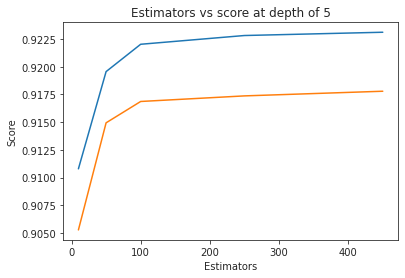

In [118]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')


depth =  3 Train Score 0.9077319534707036 test Score 0.9020862136563423
depth =  9 Train Score 0.9458729405942635 test Score 0.9257943099859117
depth =  11 Train Score 0.9581981099340723 test Score 0.9287529135081787
depth =  15 Train Score 0.9612950489408029 test Score 0.9282773109243696
depth =  20 Train Score 0.9619464522040111 test Score 0.9284017074247745
depth =  35 Train Score 0.9617018675306416 test Score 0.9288794463493131
depth =  50 Train Score 0.9617018675306416 test Score 0.9288794463493131
depth =  70 Train Score 0.9617018675306416 test Score 0.9288794463493131
depth =  130 Train Score 0.9617018675306416 test Score 0.9288794463493131


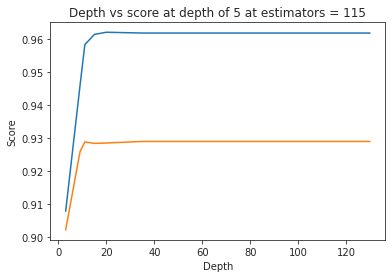

In [119]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [120]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25, return_train_score=True)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96036847 0.96011413 0.95603455 0.95935674 0.9622419 ]
mean train scores [0.96157077 0.96087157 0.95650894 0.9601801  0.96339082]


In [121]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=28, min_samples_split=111,
                       min_weight_fraction_leaf=0.0, n_estimators=121,
                       n_jobs=-1, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)


In [122]:
clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=28, min_samples_split=111,
                       min_weight_fraction_leaf=0.0, n_estimators=121,
                       n_jobs=-1, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)

In [123]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [124]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9632619037937624
Test f1 score 0.9303847929167891


In [125]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


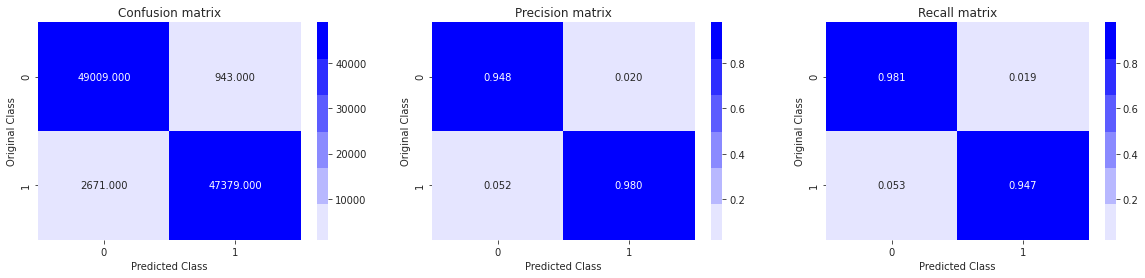

Test confusion_matrix


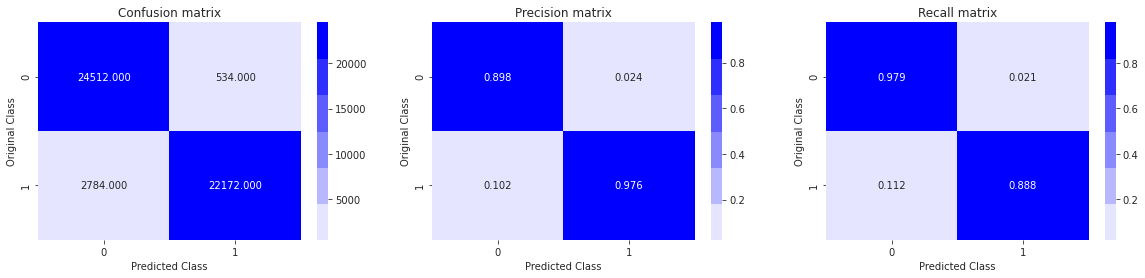

In [126]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

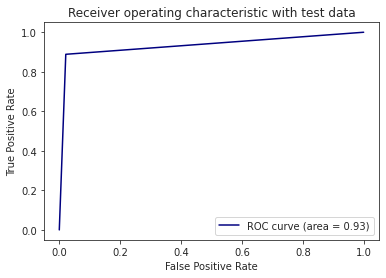

In [127]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

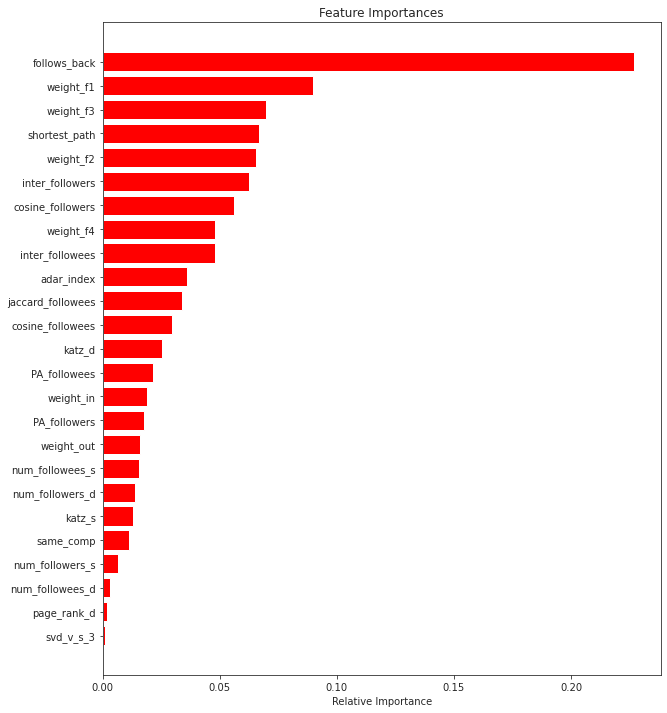

In [128]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Estimators =  10 Train Score 0.9254131685939068 test Score 0.9200093531449951
Estimators =  50 Train Score 0.9638144497841492 test Score 0.9292465739005958
Estimators =  100 Train Score 0.9731212731708799 test Score 0.9323831411161948
Estimators =  250 Train Score 0.9779977775532882 test Score 0.9324010308842791
Estimators =  450 Train Score 0.9792449020795478 test Score 0.9177554080102805


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

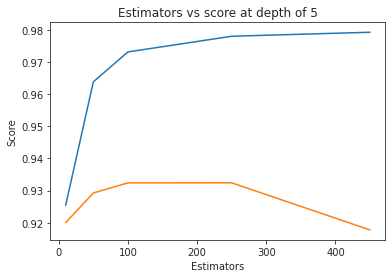

In [129]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = xgb.XGBClassifier(objective='binary:logistic', n_estimators=i)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')


depth =  1 Train Score 0.9297505925786085 test Score 0.9236288433536625
depth =  2 Train Score 0.9634714789125732 test Score 0.9269093204292026
depth =  3 Train Score 0.9731212731708799 test Score 0.9323831411161948
depth =  4 Train Score 0.9749443432503542 test Score 0.9342465753424658
depth =  5 Train Score 0.9768815355676462 test Score 0.9347601693665607


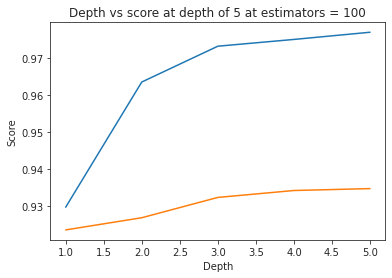

In [130]:
depths = [1,2,3,4,5]
train_scores = []
test_scores = []
for i in depths:
    clf = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, max_depth=i)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 100')
plt.show()

In [131]:
param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15)
              }

clf = xgb.XGBClassifier(objective='binary:logistic', random_state=25,n_jobs=-1)

xgb_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25, return_train_score=True)

xgb_random.fit(df_final_train,y_train)
print('mean test scores',xgb_random.cv_results_['mean_test_score'])
print('mean train scores',xgb_random.cv_results_['mean_train_score'])

mean test scores [0.97991932 0.97993146 0.97953032 0.97985492 0.97988669]
mean train scores [0.99990342 0.99993339 0.99232804 0.99537968 0.99571373]


In [133]:
xgb_random.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=14,
              min_child_weight=1, missing=None, n_estimators=123, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=25,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [134]:
clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=14,
              min_child_weight=1, missing=None, n_estimators=123, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=25,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [135]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [136]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9998701130016886
Test f1 score 0.9331026771587096


Train confusion_matrix


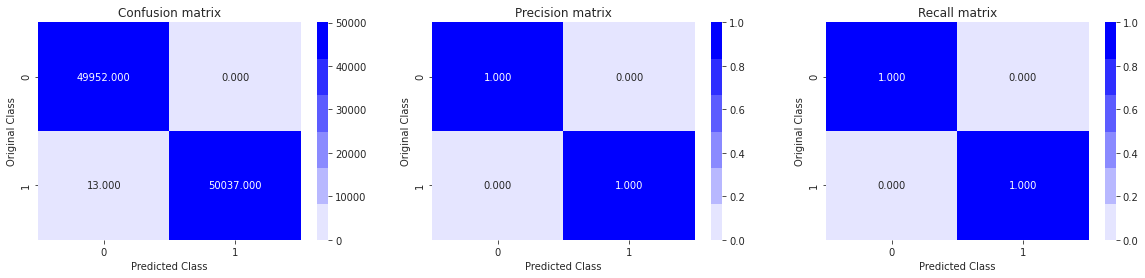

Test confusion_matrix


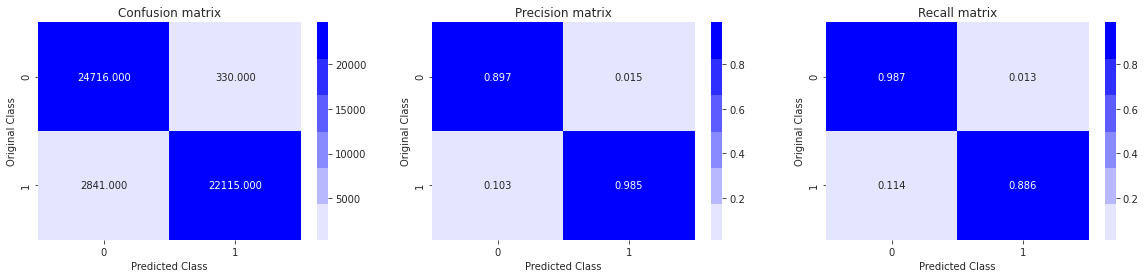

In [137]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

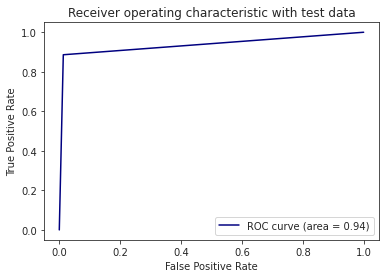

In [138]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

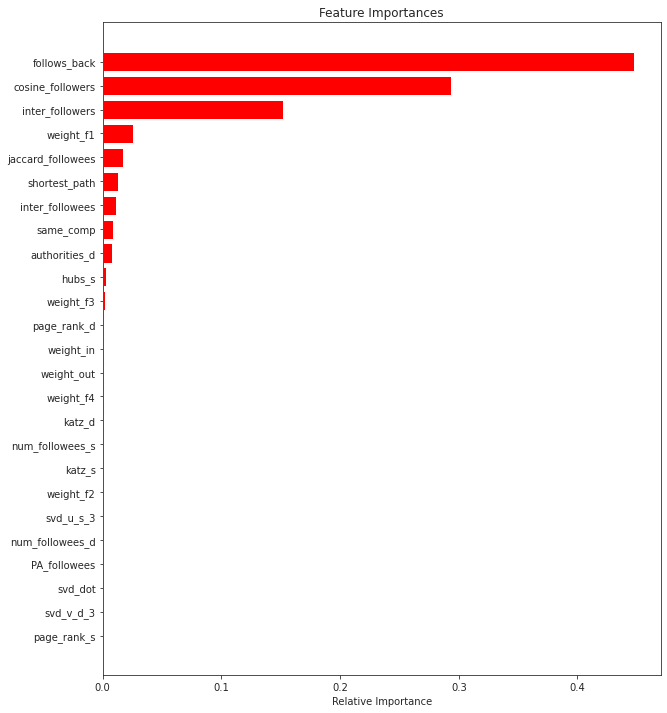

In [139]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [142]:
from prettytable import PrettyTable 
x = PrettyTable()
x.field_names = ["Model", "n_estimators", "max_depth", "Train f1-Score","Test f1-Score"]
x.add_row(['Random Forest','121','14','0.9632','0.9303'])
x.add_row(['XGBOOST','123','14','0.9998','0.9331'])
print(x)

+---------------+--------------+-----------+----------------+---------------+
|     Model     | n_estimators | max_depth | Train f1-Score | Test f1-Score |
+---------------+--------------+-----------+----------------+---------------+
| Random Forest |     121      |     14    |     0.9632     |     0.9303    |
|    XGBOOST    |     123      |     14    |     0.9998     |     0.9331    |
+---------------+--------------+-----------+----------------+---------------+
